# Module 13 — Probability



## 1 — Basics of Probability

**1a. Coin toss simulation**

Toss a fair coin 10,000 times and compute experimental probabilities.

In [1]:
import random
n_tosses = 10000
heads = 0
for _ in range(n_tosses):
    if random.choice([0,1]) == 1:
        heads += 1
p_heads = heads / n_tosses
p_tails = 1 - p_heads
print('Heads:', heads, 'P(heads)=', p_heads)
print('Tails:', n_tosses-heads, 'P(tails)=', p_tails)

Heads: 5000 P(heads)= 0.5
Tails: 5000 P(tails)= 0.5


**1b. Two dice — probability of sum 7**

Roll two dice many times (loop) and count sum==7.

In [2]:
import random
trials = 100000
count_sum7 = 0
for _ in range(trials):
    d1 = random.randint(1,6)
    d2 = random.randint(1,6)
    if d1 + d2 == 7:
        count_sum7 += 1
print('Count sum=7:', count_sum7, 'Probability ~', count_sum7/trials)

Count sum=7: 16681 Probability ~ 0.16681


## 2 — At least one 6 in 10 rolls

Estimate P(at least one 6 in 10 rolls) by simulation.

In [3]:
import random

def estimate_at_least_one_six(n_rolls=10, n_trials=100000):
    success = 0
    for _ in range(n_trials):
        found = False
        for _ in range(n_rolls):
            if random.randint(1,6) == 6:
                found = True
                break
        if found:
            success += 1
    return success / n_trials

print('Estimated P(at least one 6 in 10 rolls):', estimate_at_least_one_six())

Estimated P(at least one 6 in 10 rolls): 0.83825


## 3 — Conditional Probability & Bayes

Bag: 5 red, 7 green, 8 blue (20). With replacement, simulate 1000 draws and estimate P(current=red | previous=blue).

In [4]:
import random
colors = ['red']*5 + ['green']*7 + ['blue']*8
num_steps = 1000
prev = None
prev_blue_count = 0
prev_blue_and_current_red = 0
for _ in range(num_steps):
    cur = random.choice(colors)
    if prev == 'blue':
        prev_blue_count += 1
        if cur == 'red':
            prev_blue_and_current_red += 1
    prev = cur
prob = prev_blue_and_current_red / prev_blue_count
print('Simulated P(red | prev=blue)=', prob)
print('Theoretical P(red)=', 5/20)


Simulated P(red | prev=blue)= 0.2548076923076923
Theoretical P(red)= 0.25


## 4 — Discrete random variable

Generate 1000 samples from X with P(1)=0.25, P(2)=0.35, P(3)=0.40.

In [5]:
import numpy as np
values = [1,2,3]
probs = [0.25,0.35,0.40]
sample = np.random.choice(values, size=1000, p=probs)
print('Mean:', sample.mean())
print('Variance (population):', sample.var())
print('Variance (sample, ddof=1):', sample.var(ddof=1))
print('Std:', sample.std())

Mean: 2.141
Variance (population): 0.6251189999999999
Variance (sample, ddof=1): 0.6257447447447446
Std: 0.7906446736682666


## 5 — Exponential (continuous)

Simulate 2000 samples from Exp(mean=5). Plot histogram + theoretical PDF.

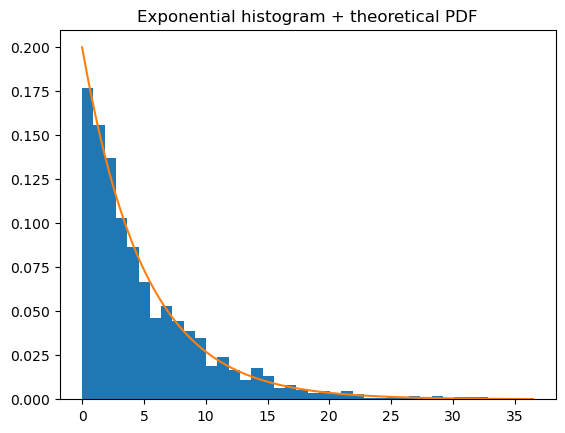

In [6]:
import numpy as np
import matplotlib.pyplot as plt
exp_mean = 5.0
exp_samples = np.random.exponential(scale=exp_mean, size=2000)
plt.hist(exp_samples, bins=40, density=True)
x = np.linspace(0, np.max(exp_samples), 200)
pdf = (1/exp_mean) * np.exp(-x/exp_mean)
plt.plot(x, pdf)
plt.title('Exponential histogram + theoretical PDF')
plt.show()

## 6 — Central Limit Theorem

Generate 10000 uniform(0,1) numbers, draw 1000 samples of size 30, compute sample means, and visualize both distributions.

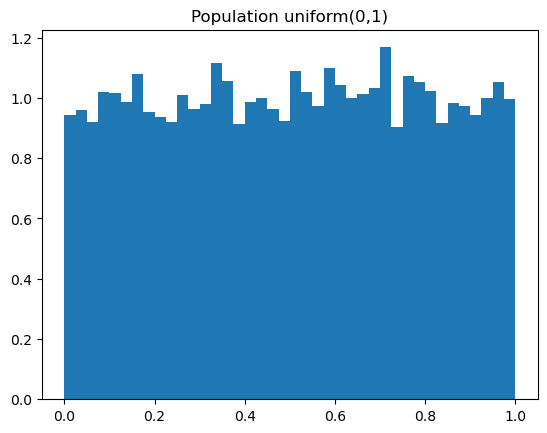

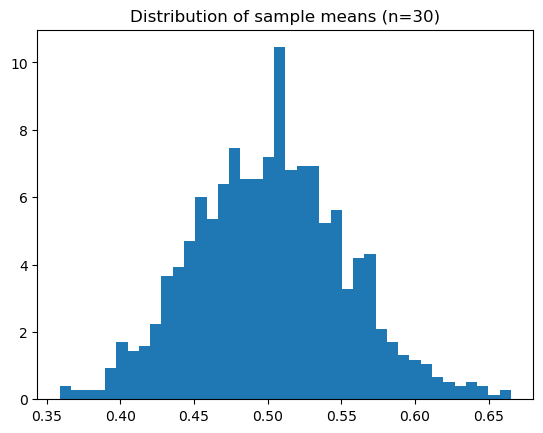

In [7]:
import numpy as np
import matplotlib.pyplot as plt
population = np.random.uniform(0,1,10000)
n_samples = 1000
n = 30
sample_means = np.array([np.mean(np.random.choice(population, size=n, replace=True)) for _ in range(n_samples)])
plt.hist(population, bins=40, density=True)
plt.title('Population uniform(0,1)')
plt.show()
plt.hist(sample_means, bins=40, density=True)
plt.title('Distribution of sample means (n=30)')
plt.show()